## <p style="text-align: right;"> &#9989; Karen Sandy</p>

# CMSE 202 Final (Section 3 - Spring 2024)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed having now finished CMSE 202. In particular, you'll be committing and pushing repository changes to a GitHub repository, working with data to build a network graph, performing regression analysis, and classifying data using a machine learning classifier. You should find that you have all of the skills necessary to complete this exam having completed the second half of CMSE 202!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, you'll probably want to make sure you do Part 1 first to ensure that your GitHub repository is working correctly. Let your instructor know right away if you run into issues!

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. You can also use _your version_ of past CMSE 202 assignments and the CMSE 202 course materials as a resource! **However: The use of any person-to-person communication software or generative AI tools is absolutely not acceptable.** If you are seen accessing your email, using a collaborative cloud storage or document software (e.g. Slack, Google Documents), or generative AIs (e.g. ChatGPT), you will be at risk for receiving a zero on the exam and the course.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero. If you're completing the exam virtually, the same standards of academic integrity apply!

There are **72 points** possible on this exam. The point breakdowns are in the section headers and within each question.

---
## Part 0: Academic integrity statement (3 points)

Read the following statement and edit the markdown text to put your name in the statement. This is your commitment to doing your own authentic work on this exam.

> I, **Karen Sandy**, affirm that this exam represents my own authetic work, without the use of any unpermitted aids or resources or person-to-person communication. I understand that this exam is an opportunity to showcase my own progress in developing and improving my computational skills and have done my best to demonstrate those skills.

---
## Part 1: Add to your Git repository to track your progress on your exam (2 points)

Before you get too far along in the exam, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `final` directory that you just created. Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
#git clone https://github.com/renn463/cmse202-s24-turnin.git

```

---
## Part 2: Generate a network graph from data (21 points)

In this part of the exam, we will use the faces dataset from scikit-learn and create a graph with faces as nodes and do some analysis. First, run the cell below to load the data. 

In [1]:
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

from sklearn.datasets import fetch_lfw_people
sk_data = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names
images = sk_data.images
print(images.shape)  #To check the dimensions of "images"

### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

(1560, 50, 37)


&#9989; **Question 2.1 (2 points)**: Lets only select the first 20 entries or images in the data. First, create a graph named `G` using the `networkx` package with the first 20 images as nodes 0-19. For example, for creating node 10, you should use `.add_node(10,image= images[10])`.

In [6]:
### Put your code for Question 2.1 here.
import networkx as nx
G = nx.DiGraph()
G= G.add_node(20,image = images[20])


&#9989; **Question 2.2 (4 points)**: Use the `distance_matrix` function in `scipy.spatial` to compute the distances between all pairs of images amongst the 20 images. Also include code to import the function.
For each node in graph `G`, only add edges from it to those nodes where the distance between the corresponding images is less than a threshold 8. *You may use loops to check distances from each node/image and add edges.*

In [9]:
### Put your code for Question 2.2 here.

for i in G:
    j = i+1
    for j in G:
        distance =scipy.spatial.distance_matrix(i,i+1,p=2)
        return distance 


SyntaxError: 'return' outside function (972276014.py, line 7)

&#9989; **Question 2.3 (3 points)**: Now, running the code below will display the graph. Make sure it runs/produces output and briefly explain what the code does (overall explanation, not line by line).

In [ ]:
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

import matplotlib.pyplot as plt

pos=nx.circular_layout(G)

fig=plt.figure(figsize=(14,14))
ax=plt.subplot(111)
ax.set_aspect('equal')
nx.draw_networkx_edges(G,pos,ax=ax)

plt.xlim(-1,1)
plt.ylim(-1,1)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

size=0.05 # image size
p2=size/2.0
for n in G:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, size, size])
    a.set_aspect('equal')
    a.set_title('Node = %i' %n)
    a.imshow(G.nodes[n]['image'],cmap='gray')
    a.axis('off')
ax.axis('off')
plt.show()

### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell and put your answer/explanation here.**

&#9989; **Question 2.4 (2 points)**: Now repeat the steps for Questions 2.1 to 2.3 but with a threshold of 7 for creating the edges. Give the graph here a new name `H`. What is the difference in the displayed graph with the new threshold? Does it have more or fewer edges?

In [ ]:
### Put your code for Question 2.4 here


&#9989; **Question 2.5 (2 points)**: What is a complete graph? Are the graphs in Questions 2.3 and 2.4 complete graphs?

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell and put your answer here.**

&#9989; **Question 2.6 (2 points)**: Write `networkx` code to determine how many nodes are connected or adjacent to `node 6` and `node 1` in Graph `G` (in Question 2.3). **You will only get points when writing appropriate code and not for providing the answer otherwise.**

In [12]:
### Put your code for Question 2.6 here

&#9989; **Question 2.7 (2 points)**: Use `networkx` to generate the adjacency matrix of Graph `G` (in Question 2.3) and print it.

In [ ]:
### Put your code for Question 2.7 here


&#9989; **Question 2.8 (4 points)**: For the adjacency matrix provided in the cell below, use `networkx` code to generate the graph corresponding to it and display the graph using a circular layout. Also, use `networkx` code to obtain the `Laplacian matrix` of this graph and print it in a 2D array format. What is the `Laplacian matrix`? You may look up documentation/search online.

In [27]:
### Put your code for Question 2.8 here.

#Use the adjacency matrix below to complete this question.
import numpy as np
adj = np.array([
                [0,0,0,1,1,1],
                [0,0,0,1,1,1],
                [0,0,0,1,1,1],
                [1,1,1,0,0,0],
                [1,1,1,0,0,0],
                [1,1,1,0,0,0]
])


<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell and explain the Laplacian matrix concept here.**

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**
m
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 2**", and push the changes to GitHub.

---

---
## Part 3: Perform a regression analysis on data (21 points)

In this part of the exam, we will work with some California housing data available from `sklearn.datasets`. Read the data in using the code below. You can read more about the data at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing and the linked user guide.

In [10]:
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = housing.data
prediction_target = housing.target
data_column_names = housing.feature_names
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

&#9989; **Question 3.1 (3 points)**: First convert the `data` into a Pandas dataframe with column names as in `data_column_names`. Display the first 8 rows of the dataframe to check if it is displaying correctly. Convert the `prediction_target` which has average house values to a Pandas series. Make sure to use these for subsequent questions.

In [18]:
### Put your code for Question 3.1 here
import pandas as pd
housing = pd.DataFrame(data, columns = data_column_names)

prediction_target = pd.Series(prediction_target)

print(housing.head(8))
print(prediction_target.head(8))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
5    -122.25  
6    -122.25  
7    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
dtype: float64


&#9989; **Question 3.2 (4 points)**: Make two scatter plots with the prediction_target data on the $y$-axis of both plots and the x-axis being `HouseAge` and `AveOccup`, respectively. Give both plots a title and label the x and y axes on both plots meaningfully.

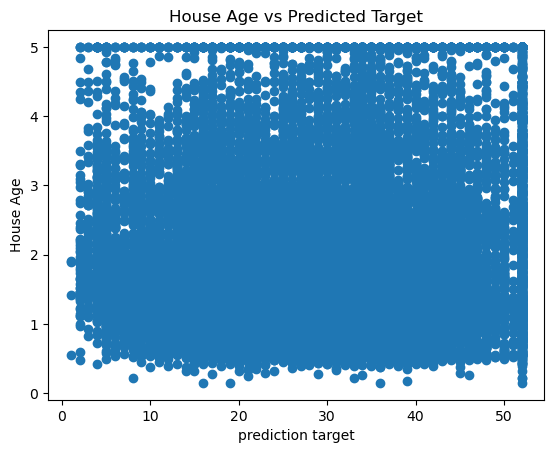

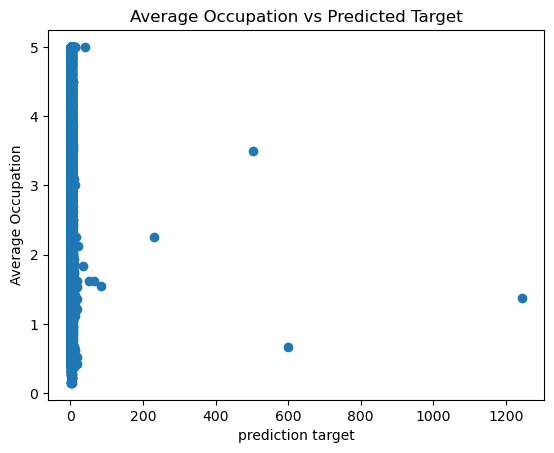

In [27]:
### Put your code for Question 3.2 here
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(1,1,1)
plt.scatter(housing['HouseAge'], prediction_target)
plt.xlabel("prediction target")
plt.ylabel("House Age")
plt.title("House Age vs Predicted Target")
plt.show()

plt.scatter(housing['AveOccup'], prediction_target)
plt.xlabel("prediction target")
plt.ylabel("Average Occupation")
plt.title("Average Occupation vs Predicted Target")
plt.show()

&#9989; **Question 3.3 (1 point)**: Do you see any outliers in your plot with `AveOccup` data? Do you think linear regression makes sense for predicting the average house value based off either `HouseAge` or `AveOccup`?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer here.

&#9989;  **Question 3.4 (5 points)**: Using the `OLS` method in `statsmodels`, let us perform a multivariable linear regression to predict the average house value (`prediction_target`) based on all the eight features in the data. Use the `add_constant()` method in `statsmodels` to ensure the model includes a constant term as well. Display the summary after fitting the model. What are the R-squared and adjusted R-squared values? Comment on the goodness of fit based on those.

In [29]:
### Put your code for Question 3.4 here
import statsmodels.api as sm

y = prediction_target
x = housing 
x_with_cnst = sm.add_constant(x)

model_perfect = sm.OLS(y,x_with_cnst)
results = model_perfect.fit()
print(results.summary())
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:45:21   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

<font size=+3>&#9998;</font> 
-The R-square value is not best with a value of 0.606
-moreover the only insignificate feature to the model was population as it p value was greater than .05 (it was 0.402)

&#9989;  **Question 3.5 (4 points)**: Based on the results above, which feature/variable has the least significant effect on the fit? Redo the OLS fit and results summary dropping this variable. Does the R-squared value change a lot? Which feature (excluding constant) in this fit gets the largest coefficient?

In [31]:
### Put your code for Question 3.5 here
y = prediction_target
x = housing[["MedInc","HouseAge","AveRooms","AveBedrms","AveOccup","Latitude","Longitude"]]
x_with_cnst = sm.add_constant(x)

model_perfect = sm.OLS(y,x_with_cnst)
results = model_perfect.fit()
print(results.summary())
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:53:06   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9175      0.658    -56.085      0.0

<font size=+3>&#9998;</font>it did not make a difference to the R-sqaure value.

&#9989;  **Question 3.6 (4 points)**: Based on the results in Question 3.5, create three `.graphics.plot_regress_exog` figures, one with respect to `HouseAge`, one with respect to `AveOccup`, and one for `MedInc`. Specify reasonable figure sizes so the figures are large enough to see clearly. Comment on the residuals you observe.

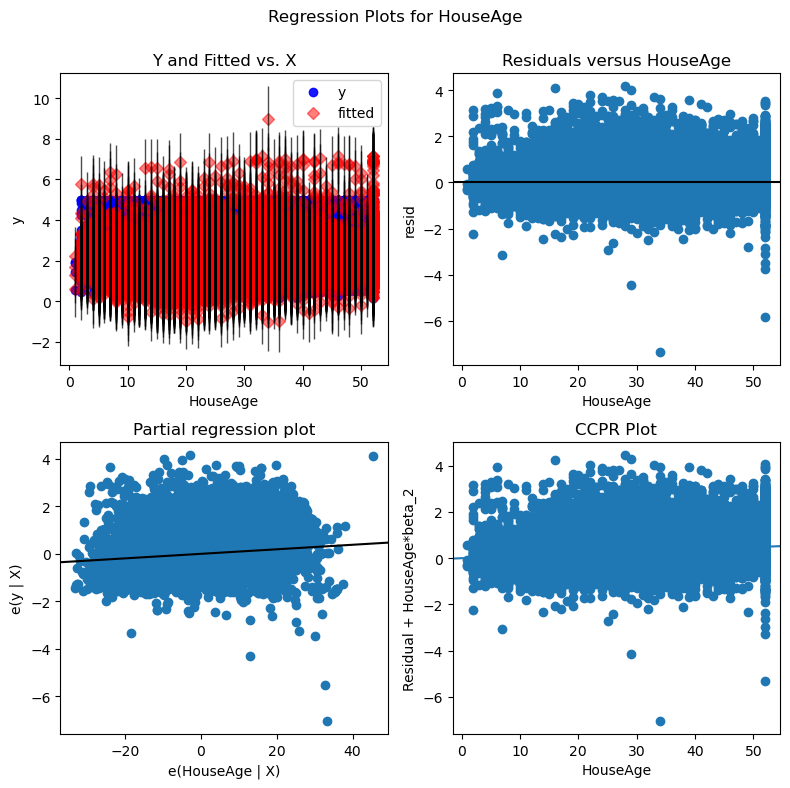

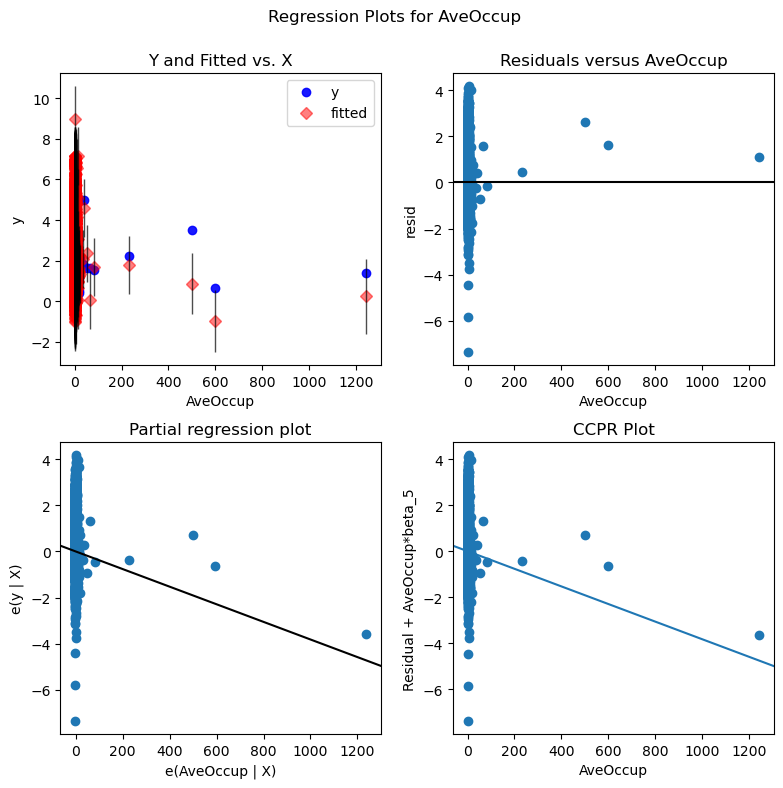

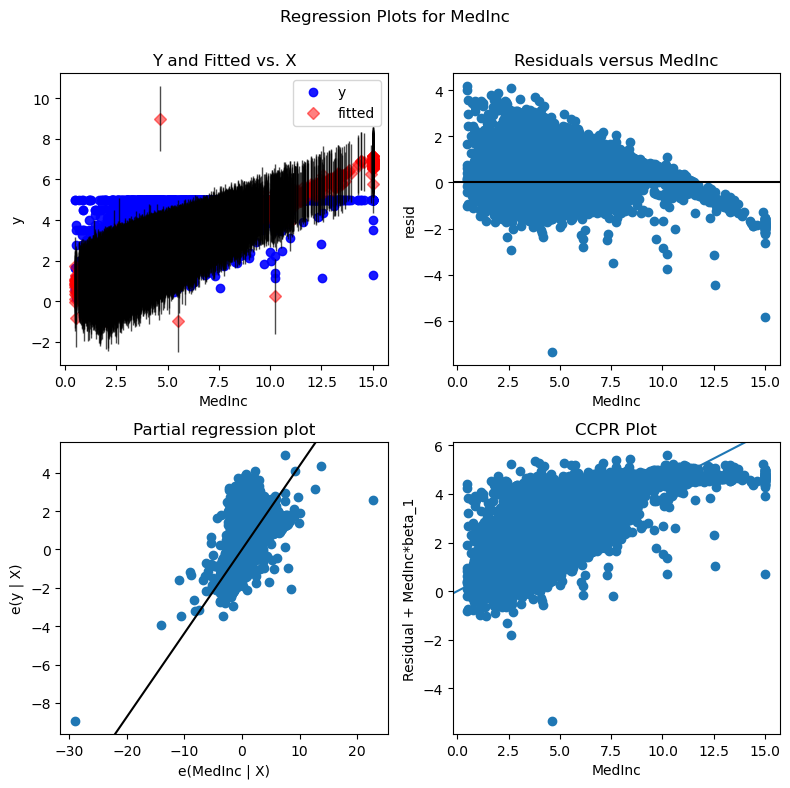

In [32]:
### Put your code for Question 3.6 here
fig = plt.figure(figsize = (8,8))
fig = sm.graphics.plot_regress_exog(results, 'HouseAge', fig = fig)

fig = plt.figure(figsize = (8,8))
fig = sm.graphics.plot_regress_exog(results, 'AveOccup', fig = fig)

fig = plt.figure(figsize = (8,8))
fig = sm.graphics.plot_regress_exog(results, 'MedInc', fig = fig)

<font size=+3>&#9998;</font> 

**House Age**

**Ave Occupation**

**Med Inc**

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", and push the changes to GitHub.

---

---
## Part 4: Perform a support vector machine (SVM) classification on data (25 points)

In this part of the exam, we will use a support vector machine (SVM) classifier to classify features from 7 different types of beans. The dataset and information is available at https://www.kaggle.com/datasets/nimapourmoradi/dry-bean-dataset-classification and the CSV file can be downloaded at https://raw.githubusercontent.com/ravisha3/CMSE202Spring2024Section3Final/main/Dry_Bean_Dataset.csv 

&#9989; **Question 4.1 (3 points)**: Write the jupyter notebook command to download the CSV file from the github link above to your directory. Read the data using Pandas and display its first 8 rows.

In [1]:
### Put your code for Question 4.1 here

&#9989; **Question 4.2 (4 points)**: Write code to display how many features (exclude labels) and how many samples are there in the dataset. There are 7 classes: `SEKER`, `BARBUNYA`, `BOMBAY`, `CALI`, `HOROZ`, `SIRA`, `DERMASON`. Turn these labels into respective numbers from 1-7 and save the data in a new dataframe. 

In [ ]:
### Put your code for Question 4.2 here


Now that the data is properly loaded into Python, we need to perform a **train-test-split** so that we can build our SVM classifier and test it.

&#9989; **Question 4.3 (4 points)**: **Use the `train_test_split()` method** from `sklearn.model_selection` like we did in class. Use a `train_size` of `0.8` and `random_state` of `161803`. You should now have a training and a testing set with "labels" and "features" each. Finally, **print the shape of your training features, training labels, testing features, and testing labels** to verify that your train-test-split did what it was supposed to. Make sure labels (train and test) have the right (integer) data type or convert them to it.

In [68]:
### Put your code for Question 4.3 here.


&#9989; **Question 4.4 (6 points)**: **Now Fit an SVM classifier (using the `sklearn` `SVC` class) to the dataset.** Use a `linear` kernel and set the hyper-parameter `C=10.` Then **fit your training set** and use the resulting fit to **predict your the testing set** so you get predicted labels for the testing set. Finally, **print the fit statistics** using the `confusion_matrix()` and `classification_report()` methods.

In [84]:
### Put your code for Question 4.4 here


&#9989; **Question 4.5 (5 points)**: Answer the following questions regarding the confusion matrix and classification report:  
* Would you consider this a good or a bad classifier based on the statistics? Explain briefly. (2 points)
* What is the confusion matrix showing? (1 point)
* What are the ranges of the precision values and recall values above across classes? (2 points)

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell and put your answer here.**

&#9989; **Question 4.6 (3 points)**: Answer the following questions:  
* If you are a tumor surgeon wanting to avoid operating on healthy subjects at all costs (based on classifier that says patient with tumor or not), would you want high precision or high recall? (1 point)
* Apart from the linear kernel, what other kernel(s) did you learn for SVM in class? (1 point)
* What trade-off does tuning the `C` hyperparameter in `sklearn SVC` class help achieve? (1 point)

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell an put your answer here.**

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 4**", and push the changes to GitHub.

---

## You're done! Congrats on finishing your CMSE 202 Final!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.